In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from patsy import dmatrices
import statsmodels.api as sm
from utilities import *

In [2]:
# importing the feature file
datafile_path= './'
datafile_name= 'SegmentFeatures2.csv'
data= pd.read_csv(datafile_path+datafile_name, delimiter=',')
display(data.head())

,SegmentId,RecordNum,StartingTime,RRBreach,SpO2Breach,RRHighRegions,SpO2LowRegions,Stage1OccurL,Stage2OccurL,Stage3OccurL,RRUnsafeRegions,SpO2UnsafeRegions,Stage1OccurH,Stage2OccurH,Stage3OccurH,FeatureSum,Type1Pattern
0,Seg0,3861446,30.0,0,0,0,0,2,0,1,12,7,1,0,0,23,1
1,Seg1,3861446,31.0,0,0,0,0,3,0,1,12,7,1,0,0,24,1
2,Seg2,3861446,32.0,0,0,0,0,2,0,1,12,6,1,0,0,22,1
3,Seg3,3861446,4.0,0,1,0,1,5,1,1,2,3,0,0,0,14,1
4,Seg4,3861446,8.0,0,1,0,1,4,1,1,4,4,1,0,0,17,1


In [3]:
X=data[['RRBreach', 'SpO2Breach',
       'RRHighRegions', 'SpO2LowRegions', 'Stage1OccurL', 'Stage2OccurL',
       'Stage3OccurL', 'RRUnsafeRegions', 'SpO2UnsafeRegions', 'Stage1OccurH',
       'Stage2OccurH', 'Stage3OccurH']]
X.head()

,RRBreach,SpO2Breach,RRHighRegions,SpO2LowRegions,Stage1OccurL,Stage2OccurL,Stage3OccurL,RRUnsafeRegions,SpO2UnsafeRegions,Stage1OccurH,Stage2OccurH,Stage3OccurH
0,0,0,0,0,2,0,1,12,7,1,0,0
1,0,0,0,0,3,0,1,12,7,1,0,0
2,0,0,0,0,2,0,1,12,6,1,0,0
3,0,1,0,1,5,1,1,2,3,0,0,0
4,0,1,0,1,4,1,1,4,4,1,0,0


In [4]:
Y=data[['Type1Pattern']]
Y.head()

,Type1Pattern
0,1
1,1
2,1
3,1
4,1


In [5]:
corr=X.corr()
display(corr)

,RRBreach,SpO2Breach,RRHighRegions,SpO2LowRegions,Stage1OccurL,Stage2OccurL,Stage3OccurL,RRUnsafeRegions,SpO2UnsafeRegions,Stage1OccurH,Stage2OccurH,Stage3OccurH
RRBreach,1.000000,0.246275,0.739183,0.197097,-0.303580,-0.070675,-0.070825,0.372319,0.154951,0.682676,0.377002,0.334912
SpO2Breach,0.246275,1.000000,0.176912,0.587659,-0.174370,0.143145,-0.021362,0.167065,0.492806,0.204049,0.459645,0.368877
RRHighRegions,0.739183,0.176912,1.000000,0.110094,-0.324040,-0.132607,-0.118245,0.012596,0.131423,0.588039,0.219365,0.281808
SpO2LowRegions,0.197097,0.587659,0.110094,1.000000,-0.197587,0.034151,-0.041974,0.137198,0.290464,0.132018,0.305015,0.402689
Stage1OccurL,-0.303580,-0.174370,-0.324040,-0.197587,1.000000,0.048722,0.150371,-0.304940,-0.241225,-0.274229,-0.124073,-0.171272
Stage2OccurL,-0.070675,0.143145,-0.132607,0.034151,0.048722,1.000000,0.043365,-0.064037,0.027976,-0.040064,0.112561,0.059158
Stage3OccurL,-0.070825,-0.021362,-0.118245,-0.041974,0.150371,0.043365,1.000000,-0.067263,-0.052458,-0.093636,0.023341,0.016374
RRUnsafeRegions,0.372319,0.167065,0.012596,0.137198,-0.304940,-0.064037,-0.067263,1.000000,0.088887,0.370212,0.184638,0.143829
SpO2UnsafeRegions,0.154951,0.492806,0.131423,0.290464,-0.241225,0.027976,-0.052458,0.088887,1.000000,0.255344,0.216397,0.100240
Stage1OccurH,0.682676,0.204049,0.588039,0.132018,-0.274229,-0.040064,-0.093636,0.370212,0.255344,1.000000,0.207792,0.242606


# Analyzing correlation among features


In [6]:
# function to display heatmap

# the bigger the size of boxes, the more the correlation
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)

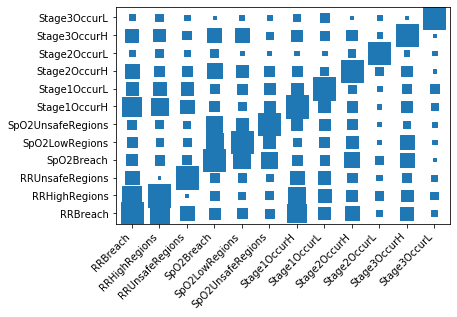

In [7]:
import seaborn as sns
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']

heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

# Splitting the Training and Test Set in 3:1 ratio


In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/4,random_state = 10)
display(y_test['Type1Pattern'].value_counts(normalize=True) * 100)
display(y_train['Type1Pattern'].value_counts(normalize=True) * 100)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
print(np.shape(y_train))
print(np.shape(y_test))

0    51.851852
1    48.148148
Name: Type1Pattern, dtype: float64

1    50.353357
0    49.646643
Name: Type1Pattern, dtype: float64

(1132,)
(378,)


# Logistic Regression with Default Params

[[180  16]
 [ 11 171]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       196
           1       0.91      0.94      0.93       182

    accuracy                           0.93       378
   macro avg       0.93      0.93      0.93       378
weighted avg       0.93      0.93      0.93       378



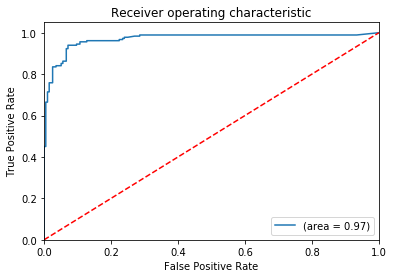

0.5206046936976465

Model Classification stats with Optimal Threshold
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       196
           1       0.92      0.93      0.93       182

    accuracy                           0.93       378
   macro avg       0.93      0.93      0.93       378
weighted avg       0.93      0.93      0.93       378



,Value
accuracy,0.931217
recall,0.934066
precision,0.923913
f1-score,0.928962
roc_auc_score,0.969332


In [9]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
model_logreg = clf.fit(X_train, y_train)

metrics_analysis(X_test,y_test,model_logreg)

optimal_threshold=plot_rocauc(X_test,y_test,model_logreg)

print('Model Classification stats with Optimal Threshold')
display_classification_metrics(X_test,y_test,model_logreg,optimal_threshold)

# Finding the best model params using Grid Search CV


In [10]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(random_state=10,solver="liblinear")
logreg_cv=GridSearchCV(logreg,grid, cv=5)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1'}
accuracy : 0.8798586572438163


# Fitting Logistic Regression with Best Params found using Grid Search


In [11]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 0)
logreg_bestparam = LogisticRegression(C=1.0, penalty='l1', solver='liblinear',random_state = 10)
logreg_bestparam.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=10, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Metric Analysis of the model with best params

[[180  16]
 [ 11 171]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       196
           1       0.91      0.94      0.93       182

    accuracy                           0.93       378
   macro avg       0.93      0.93      0.93       378
weighted avg       0.93      0.93      0.93       378



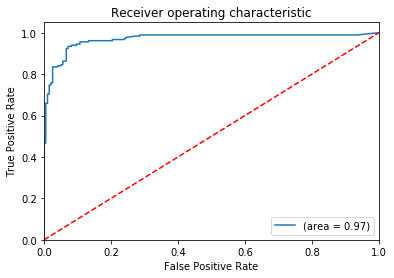

0.5264796783195619

Model Classification stats with Optimal Threshold
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       196
           1       0.92      0.93      0.93       182

    accuracy                           0.93       378
   macro avg       0.93      0.93      0.93       378
weighted avg       0.93      0.93      0.93       378



,Value
accuracy,0.928571
recall,0.928571
precision,0.923497
f1-score,0.926027
roc_auc_score,0.969192


In [12]:
metrics_analysis(X_test,y_test,logreg_bestparam)

optimal_threshold=plot_rocauc(X_test,y_test,logreg_bestparam)

print('Model Classification stats with Optimal Threshold')
display_classification_metrics(X_test,y_test,logreg_bestparam,optimal_threshold)

#### Conclusion: Default parameters perform better. So default model will do.

### -------------------Final Model-----------------------------
##### Splitting into training and testing
##### Training : 0:500 = 500
##### Training : 752:1252 = 500
##### Test: 500:752  = 252
##### Test: 1252:1510 = 258

In [13]:
# importing the feature file
datafile_path= './'
datafile_name= 'SegmentFeatures2.csv'
data= pd.read_csv(datafile_path+datafile_name, delimiter=',')
X=data[['RRBreach', 'SpO2Breach',
       'RRHighRegions', 'SpO2LowRegions', 'Stage1OccurL', 'Stage2OccurL',
       'Stage3OccurL', 'RRUnsafeRegions', 'SpO2UnsafeRegions', 'Stage1OccurH',
       'Stage2OccurH', 'Stage3OccurH']]
Y=data[['Type1Pattern']]
X_TRAIN = np.concatenate((X.values[0:500,:],X.values[752:1252,:]),axis=0)
Y_TRAIN = np.concatenate((Y.values[0:500],Y.values[752:1252]),axis=0)
Y_TRAIN = Y_TRAIN.ravel()

X_TEST = np.concatenate((X.values[500:752,:],X.values[1252:1510,:]),axis=0)
Y_TEST = np.concatenate((Y.values[500:752],Y.values[1252:1510]),axis=0)
Y_TEST = Y_TEST.ravel()
print(np.shape(X_TRAIN))
print(np.shape(Y_TRAIN))
print(np.shape(X_TEST))
print(np.shape(Y_TEST))


(1000, 12)
(1000,)
(510, 12)
(510,)


[[228  30]
 [  9 243]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       258
           1       0.89      0.96      0.93       252

    accuracy                           0.92       510
   macro avg       0.93      0.92      0.92       510
weighted avg       0.93      0.92      0.92       510



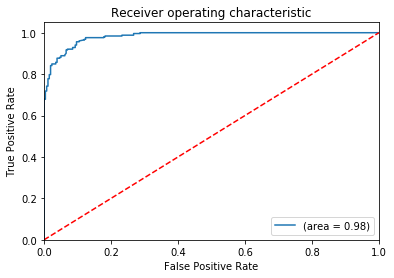

0.5292586318877316

Model Classification stats with Optimal Threshold
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       258
           1       0.91      0.95      0.93       252

    accuracy                           0.93       510
   macro avg       0.93      0.93      0.93       510
weighted avg       0.93      0.93      0.93       510



,Value
accuracy,0.927451
recall,0.952381
precision,0.905660
f1-score,0.928433
roc_auc_score,0.982950


In [14]:
clf = LogisticRegression(solver='lbfgs')
final_logreg = clf.fit(X_TRAIN, Y_TRAIN)

metrics_analysis(X_TEST,Y_TEST,final_logreg)

final_optimal_threshold=plot_rocauc(X_TEST,Y_TEST,final_logreg)

print('Model Classification stats with Optimal Threshold')
display_classification_metrics(X_TEST,Y_TEST,final_logreg,final_optimal_threshold)

In [15]:
import pickle
#### save the model to disk
model_path= './'
model_name = 'logistic_model.sav'
pickle.dump(final_logreg, open(model_path+model_name, 'wb'))